## 1. What is statcast?

Statcast is a state-of-the-art tracking system that uses high-resolution cameras and radar equipment to measure the precise location and movement of baseballs and baseball players. <strong>Statcast data is revolutionizing the game.</strong>

<strong>In this notebook </strong>, Statcast data will be discussed, analyzed and visualized to compare Shohei Ohtani and Mike Trout, two of the best baseball players in the world, who are also teammates.

It will begin by loading the data into our Notebook. There are two CSV files, ohtani.csv and trout.csv, containing Statcast data for the 2022 season.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

#Load Shoei Ohtani's statcast data
ohtani = pd.read_csv('ohtani.csv')

#Load Mike Trout's statcast data
trout = pd.read_csv('trout.csv')

In [2]:
#Display the first five rows of Ohtani file
ohtani.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,FF,2022-10-05,94.0,2.84,5.50,"Ohtani, Shohei",660271,686610,strikeout,swinging_strike,NaN,NaN,NaN,NaN,12,Shohei Ohtani strikes out swinging.,R,L,L,OAK,LAA,S,2.0,NaN,1,2,2022,0.60,1.40,0.37,3.88,NaN,NaN,NaN,1,6,Top,NaN,NaN,NaN,NaN,519390,NaN,NaN,-7.832513,-136.675534,-1.582326,9.233451,31.223390,-14.540882,3.54,1.66,NaN,NaN,NaN,95.2,2315.0,7.1,662421,686610,519390,660650,672478,676391,669397,643393,664913,668843,53.37,NaN,NaN,0.0,1.0,0.0,0.0,NaN,38,4,4-Seam Fastball,1,0,0,1,0,1,0,1,Infield shift,Standard,138.0,0.026,-0.112
1,ST,2022-10-05,80.6,2.93,5.17,"Ohtani, Shohei",660271,686610,NaN,swinging_strike,NaN,NaN,NaN,NaN,3,Shohei Ohtani strikes out swinging.,R,L,L,OAK,LAA,S,NaN,NaN,1,1,2022,-1.36,-0.59,0.47,3.36,NaN,NaN,NaN,1,6,Top,NaN,NaN,NaN,NaN,519390,NaN,NaN,-2.910508,-117.244033,3.856924,-11.974032,22.085178,-38.596169,3.54,1.66,NaN,NaN,NaN,81.7,2215.0,7.0,662421,686610,519390,660650,672478,676391,669397,643393,664913,668843,53.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38,3,Sweeper,1,0,0,1,0,1,0,1,Infield shift,Standard,296.0,0.000,-0.036
2,ST,2022-10-05,80.0,2.94,5.25,"Ohtani, Shohei",660271,686610,NaN,foul,NaN,NaN,NaN,NaN,9,Shohei Ohtani strikes out swinging.,R,L,L,OAK,LAA,S,NaN,NaN,1,0,2022,-1.74,-0.46,0.64,1.85,NaN,NaN,NaN,1,6,Top,NaN,NaN,NaN,NaN,519390,NaN,NaN,-1.822102,-116.500877,0.150724,-15.413214,23.054795,-36.636292,3.54,1.66,202.0,75.7,56.0,81.0,2244.0,7.1,662421,686610,519390,660650,672478,676391,669397,643393,664913,668843,53.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38,2,Sweeper,1,0,0,1,0,1,0,1,Infield shift,Standard,300.0,0.000,-0.031
3,CU,2022-10-05,75.7,2.39,5.72,"Ohtani, Shohei",660271,686610,NaN,ball,NaN,NaN,NaN,NaN,11,Shohei Ohtani strikes out swinging.,R,L,L,OAK,LAA,B,NaN,NaN,0,0,2022,-1.39,-0.60,-1.01,3.35,NaN,NaN,NaN,1,6,Top,NaN,NaN,NaN,NaN,519390,NaN,NaN,-4.657910,-110.093922,3.333263,-10.388733,20.451372,-37.889655,3.43,1.50,NaN,NaN,NaN,76.6,2008.0,7.1,662421,686610,519390,660650,672478,676391,669397,643393,664913,668843,53.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38,1,Curveball,1,0,0,1,0,1,0,1,Infield shift,Standard,314.0,0.000,0.023
4,ST,2022-10-05,80.1,2.89,5.18,"Ohtani, Shohei",660271,686610,field_out,hit_into_play,NaN,NaN,NaN,NaN,5,Shohei Ohtani grounds out to first baseman Der...,R,L,L,OAK,LAA,X,3.0,ground_ball,2,2,2022,-1.77,-0.42,0.16,2.34,NaN,545361.0,NaN,2,3,Top,154.75,165.38,NaN,NaN,519390,NaN,NaN,-2.706222,-116.610515,1.310645,-15.507125,24.071053,-36.451214,3.54,1.66,33.0,82.2,-1.0,81.1,2317.0,7.2,662421,686610,519390,660650,672478,640461,669397,643393,664913,668843,53.33,0.2,0.195,0.0,1.0,0.0,0.0,2.0,18,6,Sweeper,0,0,0,0,0,0,0,0,Strategic,Standard,298.0,0.037,-0.260


## 2. Analyzing batted ball events

<strong>batted ball events </strong> represents any batted ball that produces a result. This includes outs, hits and errors. Any fair ball is a Batted Ball Event. So, too, are foul balls that result in an out or an error.

Let's find the counts of batted ball events for each player in 2022.

In [3]:
#All of Shohei Ohtani's batted ball events in 2022
print("Shohei Ohtani batted ball event totals, 2022:")
print(ohtani['events'].value_counts())

#All of Mike Trout's batted ball events in 2022
print("\nMike Trout batted ball event totals, 2022:")
print(trout['events'].value_counts())

Shohei Ohtani batted ball event totals, 2022:
field_out                    239
strikeout                    160
single                        90
walk                          58
home_run                      34
double                        30
force_out                     14
grounded_into_double_play      6
triple                         6
hit_by_pitch                   5
field_error                    4
sac_fly                        3
double_play                    2
strikeout_double_play          1
Name: events, dtype: int64

Mike Trout batted ball event totals, 2022:
field_out                    153
strikeout                    139
single                        54
walk                          46
home_run                      40
double                        28
force_out                      7
grounded_into_double_play      6
hit_by_pitch                   6
field_error                    4
double_play                    3
fielders_choice                2
triple                   

## 3. Analyzing home runs

Mike Trout strikes out 3pp (percentage point) more than Ohtani. Ohtani flies out more than Trout. Now, let's get into their hitting profiles in more detail. Two of the most groundbreaking Statcast metrics are launch angle and exit velocity:
<ul>
<li><strong>Launch Angle: </strong> the vertical angle at which the ball leaves a player's bat</li>
    <li><strong>Exit Velocity: </strong> the speed of the baseball as it comes off the bat</li>
</ul>

These two metrics have become very important in the statcast era because balls hit with a high launch angle are more likely to result in a hit. Hit fast enough and at the right angle, they become home runs.

Let's analyze exit velocity vs. launch angle and focus only on home runs. The first two graphics show data points. The second two show smooth outlines to represent density.

Text(0.5, 1.0, 'Mike Trout\nHome Runs 2022')

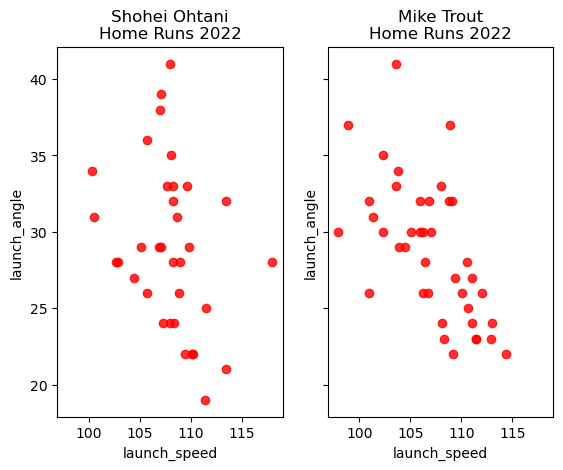

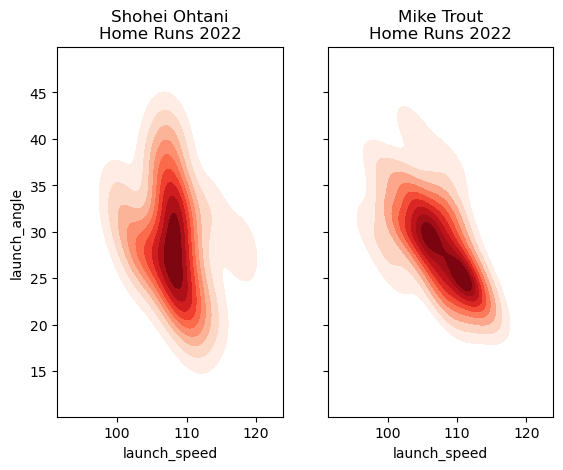

In [4]:
#Filter data to select only home runs
ohtani_hr = ohtani[ohtani['events'] == 'home_run']
trout_hr = trout[trout['events'] == 'home_run']

#Create a figure with two scatter plots of lunch speed vs launch angle
fig1, axs1 = plt.subplots (ncols=2, sharex=True, sharey=True)

sns.regplot(
    x='launch_speed',
    y='launch_angle',
    fit_reg=False,
    color='red',
    data=ohtani_hr,
    ax=axs1[0]
)
axs1[0].set_title('Shohei Ohtani\nHome Runs 2022')

sns.regplot(
    x='launch_speed',
    y='launch_angle',
    fit_reg=False,
    color='red',
    data=trout_hr,
    ax=axs1[1]
)
axs1[1].set_title('Mike Trout\nHome Runs 2022')

#Create a figure with two kernel density estimation plots of launch speed vs launch angle
fig2, axs2 = plt.subplots (ncols=2, sharex=True, sharey=True)

sns.kdeplot(
    data=ohtani_hr,
    x='launch_speed',
    y='launch_angle',
    cmap='Reds',
    fill=True,
    thresh=0.05,
    ax=axs2[0]
)
axs2[0].set_title('Shohei Ohtani\nHome Runs 2022')

sns.kdeplot(
    data=trout_hr,
    x='launch_speed',
    y='launch_angle',
    cmap='Reds',
    fill=True,
    thresh=0.05,
    ax=axs2[1]
)
axs2[1].set_title('Mike Trout\nHome Runs 2022')

## 4. Home runs by pitch velocity

As we see in the previous chart, Ohtani hits his home runs slightly higher and slightly softer than Trout. At leat in the 2022 season.

Statcast also measures the velocity of the ball coming out of the pitcher's hand and begins its journey towards the plate. This metric will be analyzed to compare Stanton's and Judge's home runs in terms of pitch velocity. Here are the five-number summaries for each player: minimum, first quartile, median, third quartile, and maximum.

Text(0.5, 1.0, 'Mike Trout\nHome Runs 2022')

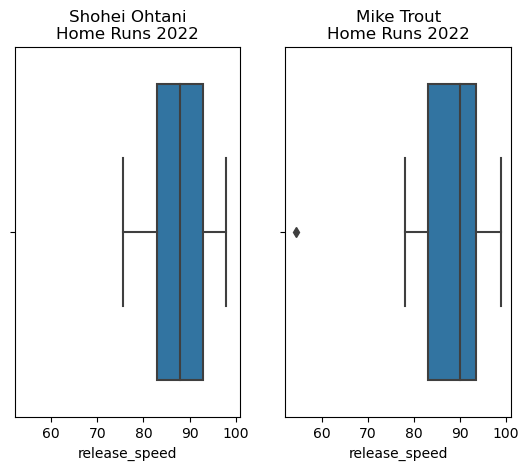

In [5]:
#Create a figure with two box plot of home runs in terms of pitch velocity
fig, axs = plt.subplots(ncols=2, sharex=True)

sns.boxplot(
data=ohtani_hr,
x='release_speed',
ax=axs[0]
)
axs[0].set_title('Shohei Ohtani\nHome Runs 2022')

sns.boxplot(
data=trout_hr,
x='release_speed',
ax=axs[1]
)
axs[1].set_title('Mike Trout\nHome Runs 2022')

## 6. Home runs by pitch location

Trout appears to hit home runs off of faster pitches than Ohtani. On the other hand, Ohtani produces more home runs on slow pitches (curves and changeups). Statcast also tracks the zone the pitch is in when it crosses the plate. The zone numbering looks like this (from the catcher's point of view):
<p><img style="margin:5px 20px 5px 1px; width:20%;" src="https://s3.amazonaws.com/assets.datacamp.com/production/project_250/img/zone.png"></p>

Below, two functions are defined to be able to plit 2D histogtams of pitch locations,

In [6]:
def assign_x_coord(row):
    """Assigns an x-coordeinate to statcast's strike zone numbers. Zones 11, 12, 13 and 14 are ignored."""

    # Left strike zone
    if row.zone in [1,4,7]:

        return 1
    # Middle strike zone
    if row.zone in [2,5,8]:
        return 2
    # Right strike zone
    if row.zone in [3,6,9]:
        return 3

In [7]:
def assign_y_coord(row):
    """Assigns an y-coordeinate to statcast's strike zone numbers. Zones 11, 12, 13 and 14 are ignored."""

    # Upper strike zone
    if row.zone in [1,2,3]:
        return 3
    # Middle strike zone
    if row.zone in [4,5,6]:
        return 2
    # Lower strike zone
    if row.zone in [7,8,9]:
        return 1

## 7. Shohei Ohtani's home run zone

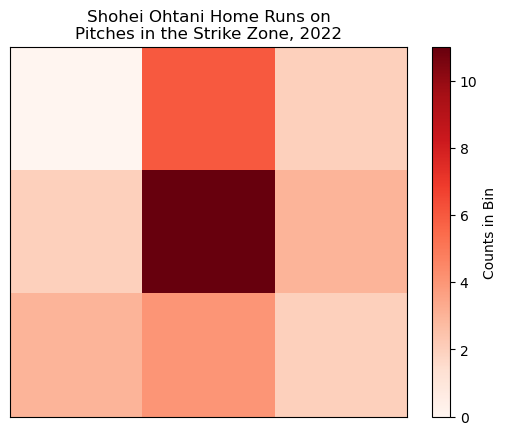

In [8]:
# Filter zone from 1 to 9
ohtani_strike_hr = ohtani_hr[ohtani_hr['zone'] <= 9].copy()

# Assign zone coordinates to pitches
ohtani_strike_hr['zone_x'] = ohtani_strike_hr.apply(assign_x_coord, axis=1)
ohtani_strike_hr['zone_y'] = ohtani_strike_hr.apply(assign_y_coord, axis=1)

# Plot Ohtani's home run zone
plt.hist2d(
    ohtani_strike_hr.zone_x,
    ohtani_strike_hr.zone_y,
    bins=3,
    cmap='Reds'
)

plt.title('Shohei Ohtani Home Runs on\nPitches in the Strike Zone, 2022')
plt.xticks([])
plt.yticks([])
cib = plt.colorbar()
cib.set_label('Counts in Bin')

## 8. Mike Trout's home runs zone

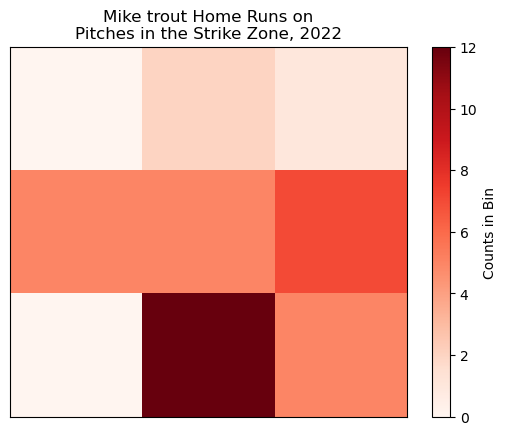

In [9]:
# Filter zone from 1 to 9
trout_strike_hr = trout_hr[trout_hr['zone'] <= 9].copy()

# Assign zone coordinates to pitches
trout_strike_hr['zone_x'] = trout_strike_hr.apply(assign_x_coord, axis=1)
trout_strike_hr['zone_y'] = trout_strike_hr.apply(assign_y_coord, axis=1)

# Plot trout's home run zone
plt.hist2d(
    trout_strike_hr.zone_x,
    trout_strike_hr.zone_y,
    bins=3,
    cmap='Reds'
)

plt.title('Mike trout Home Runs on\nPitches in the Strike Zone, 2022')
plt.xticks([])
plt.yticks([])
cib = plt.colorbar()
cib.set_label('Counts in Bin')

## 9 Conclusions
<ul>
<li> Mike Traout does not hit many home runs on the pitches in the upper third of the strike zone. He prefer the middle-low zone. </li>
<li> Shoein Ohtani hits most of his home runs in the middle-high and middle-middle strike zone.</li>
<li> Both, Shohei Ohtani and Mike Trout are great hitters, but with different characteristics in terms of home runs. If the intention is to prevent them from hitting home runs more easily, it's better to pitch high-inside to Ohtani, while it's better to pitch high to Trout. </li>
    
    